Domain - Automotive
Business challenge/requirement: Lithionpower is the largest provider of electric vehicle(e-vehicle) batteries. It provides battery on a rental model to e-vehicle drivers. Drivers rent battery typically for a day and then replace it with a charged battery from the company. Lithionpower has a variable pricing model based on driver's driving history. As the life of a battery depends on factors such as overspeeding, distance driven per day etc.You as a ML expert have to create a cluster model where drivers can be grouped together based on the driving data.

Key issues: Drivers will be incentivized based on the cluster, so grouping has to be accurate

Business benefits: Increase in profits,up to 15-20% as drivers with poor history will be charged more

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
plt.rcParams['figure.figsize']=(12,7)

In [2]:
dataset = pd.read_csv('driver-data.csv')

In [3]:
print (dataset.head())

           id  mean_dist_day  mean_over_speed_perc
0  3423311935          71.24                    28
1  3423313212          52.53                    25
2  3423313724          64.54                    27
3  3423311373          55.69                    22
4  3423310999          54.58                    25


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [5]:
x = dataset.iloc[:,[1,2]].values

In [6]:
from sklearn.cluster import KMeans

# elbow method
wcss = []
for i in range(1,11):                                 #number of clusters
    kmeans = KMeans(n_clusters=i, init = "k-means++") #init-generates centroids in the dataset based on the density
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
print (wcss) 

[12184626.129627962, 1316420.8509477214, 992634.0606702507, 719601.1096991908, 534642.1338032617, 372841.14523270074, 320094.165161292, 294438.1044119455, 252767.37028174117, 230015.63396363097]


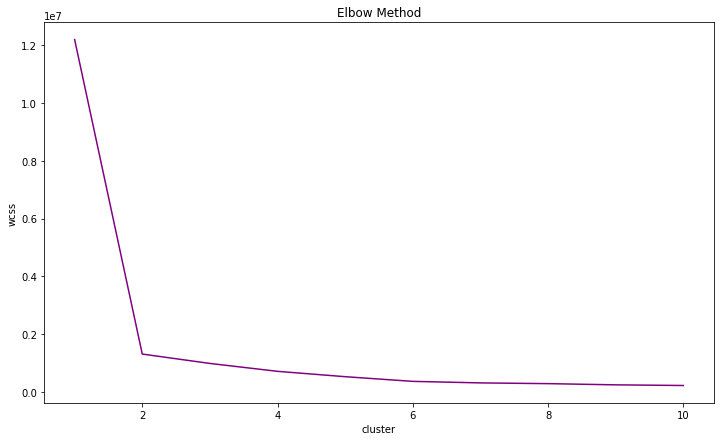

In [7]:
plt.plot(range(1,11),wcss, c='purple')
plt.xlabel("cluster")
plt.ylabel("wcss")
plt.title('Elbow Method')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=2, init='k-means++')
y_kmeans = kmeans.fit_predict(x)                        #cluster no. of individual drivers

In [9]:
# cluster center vectors
kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [10]:
print (y_kmeans)
print (len(y_kmeans))

[0 0 0 ... 1 1 1]
4000


In [19]:
#can we map back to the driver using thier ID?

In [11]:
# check how many drivers are there in 1st and 2nd cluster
print (type(y_kmeans))
unique, counts = np.unique(y_kmeans,return_counts=True)
print (dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


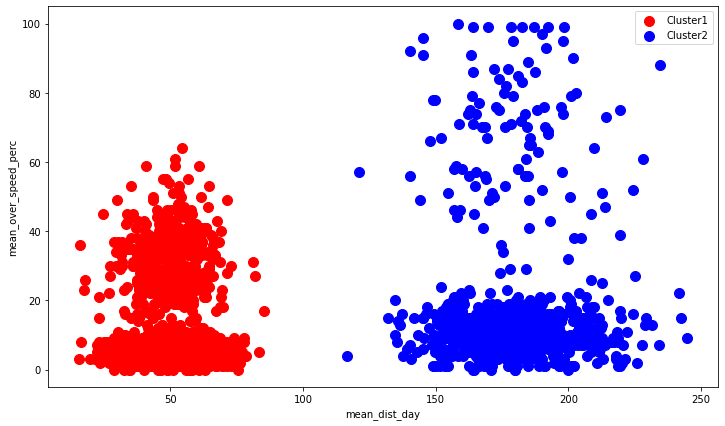

In [12]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.legend()
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')
plt.show()

In [13]:
clust = pd.DataFrame(y_kmeans)

In [14]:
pd.concat([dataset,clust],axis=1)    #concat table by index

,id,mean_dist_day,mean_over_speed_perc,0
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0
...,...,...,...,...
3995,3423310685,160.04,10,1
3996,3423312600,176.17,5,1
3997,3423312921,170.91,12,1
3998,3423313630,176.14,5,1


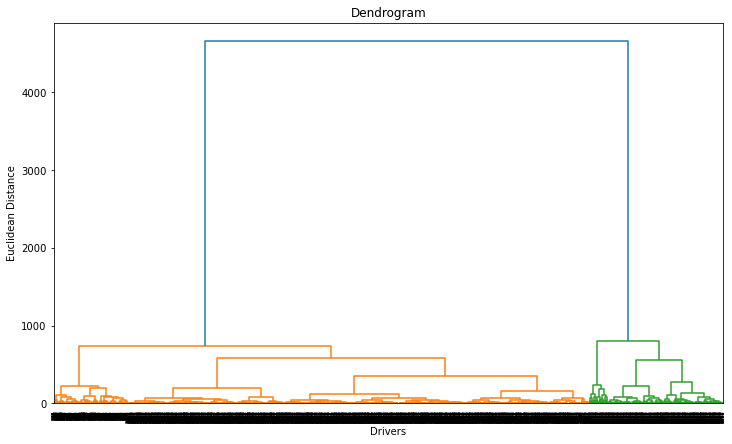

In [15]:
# create hierarchy model

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))   #creating dendrogram
plt.title('Dendrogram')
plt.xlabel('Drivers')
plt.ylabel('Euclidean Distance')
plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')     #creating cluster
y_hc = hc.fit_predict(x)

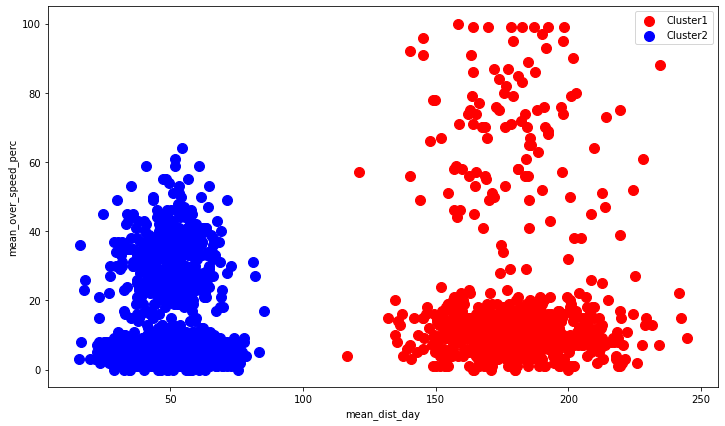

In [18]:
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], c='red', s=100, label='Cluster1')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], c='blue', s=100, label='Cluster2')
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')
plt.legend()
plt.show()